In [59]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
34268,2644,5,84.96
5831,1403,2,89.51
105212,3626,2,64.12
105026,2440,5,32.86
92776,1819,4,138.91


In [61]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08     , 0.25     ],
       [0.5625   , 0.75     ],
       [0.2      , 0.5      ],
       ...,
       [0.81375  , 0.5      ],
       [0.764375 , 0.       ],
       [0.4371875, 0.5      ]])

In [62]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.06478571],
       [0.64285714],
       [0.22857143],
       ...,
       [0.72085714],
       [0.07207143],
       [0.00185714]])

In [63]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    nb_features = X.shape[1]
    w = np.ones(shape=(nb_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predict = np.dot(w, scaled_X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predict))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predict)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predict))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

start_time_batch = time.time()
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
end_time_batch = time.time()
w, b, cost

(array([-0.00300753, -0.00209056]), 0.5027080602335645, 0.08348293376213456)

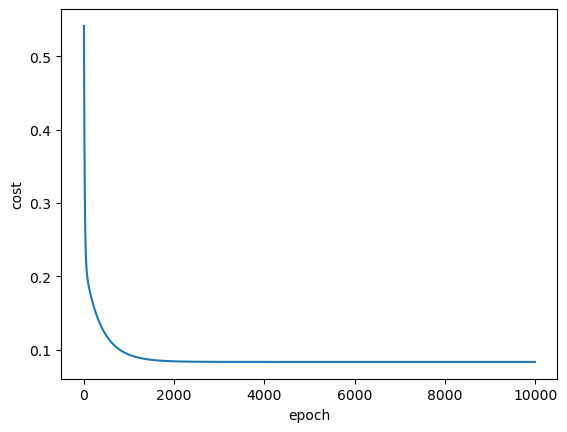

In [64]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [65]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area,bedrooms]])[0]

    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


99.92277720464628

In [66]:
predict(1000,2,w,b)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


100.27964310148619

In [68]:
time_batch = end_time_batch - start_time_batch

print(f"Temps d'execution pour Batch : {time_batch}")

Temps d'execution pour Batch : 9.306382894515991


# Stochastic Gradient Descent Implementation

In [69]:
import random
random.randint(0,6)

6

In [70]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

start_time_sgd = time.time()
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
end_time_sgd = time.time()
w_sgd, b_sgd, cost_sgd

(array([0.99944153, 0.99937086]), -0.0008342064008315667, 0.018012576940894465)

In [71]:
w, b, cost

(array([-0.00300753, -0.00209056]), 0.5027080602335645, 0.08348293376213456)

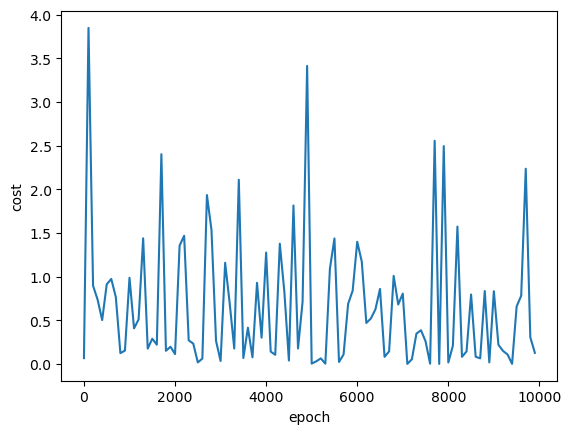

In [72]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [73]:
predict(2600,4,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


213.52317233745754

In [74]:
predict(1000,2,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


73.60630469857963

In [75]:
predict(1500,3,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


130.44706840564717

In [76]:

time_sgd = end_time_sgd - start_time_sgd

print(f"Temps d'execution pour la méthode stochastique : {time_sgd}")

Temps d'execution pour la méthode stochastique : 0.03779196739196777
